In [1]:
%pylab inline
%config InlineBackend.figure_format = 'retina'

Populating the interactive namespace from numpy and matplotlib


In [18]:
import h5py
import seaborn as sns
from sklearn.mixture import GaussianMixture
from tqdm import tqdm_notebook

sns.set_context('notebook')
sns.set_style('ticks')
sns.set_palette('colorblind')

In [4]:
with h5py.File('observations.h5', 'r') as f:
    m1s = array(f['posteriors/m1det'])
    m2s = array(f['posteriors/m2det'])
    dls = array(f['posteriors/dl'])

In [20]:
scores = []
ngs = []

In [22]:
for ng in tqdm_notebook(range(1, 10)):
    s = []
    gmm = GaussianMixture(ng)
    ns = m1s.shape[1]
    p = random.permutation(ns)
    
    n2 = ns // 2

    for i in range(m1s.shape[0]):
        gmm.fit(column_stack((m1s[i,p][:n2], m2s[i,p][:n2], dls[i,p][:n2])))
        s.append(gmm.score(column_stack((m1s[i,p][n2:], m2s[i,p][n2:], dls[i,p][n2:]))))
    
    s = array(s)
    scores.append(s)
    ngs.append(ng)
scores = array(scores)

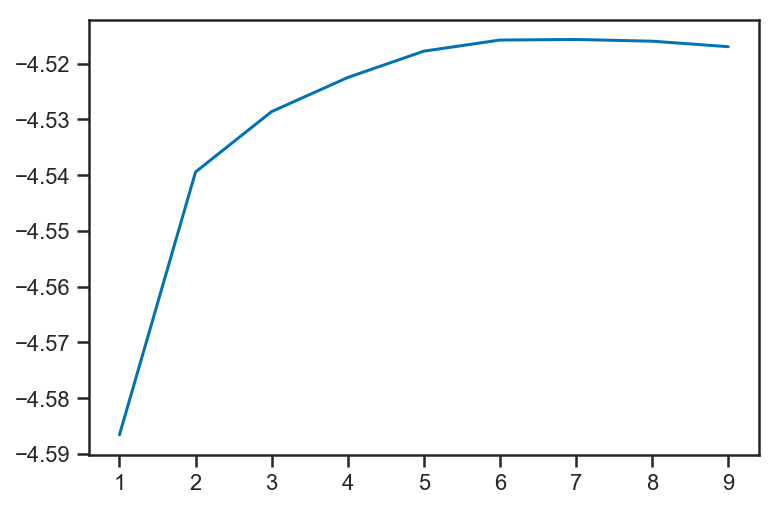

In [23]:
plot(ngs, mean(scores,axis=1))

It appears that we maximize the average score on the test sets when there are seven Gaussians in the likelihood (I'm surprised!).

In [24]:
ngs[argmax(mean(scores,axis=1))]

7

In [26]:
gmm.weights_, gmm.means_, gmm.covariances_

(array([0.09826858, 0.12114165, 0.11231079, 0.12196467, 0.07416294,
        0.10071722, 0.13427471, 0.12756934, 0.10959011]),
 array([[43.55897014, 41.30853691,  2.65296922],
        [50.26100122, 35.94370021,  2.51049213],
        [48.322863  , 35.45839197,  2.65588778],
        [53.25823234, 33.68888308,  2.45013759],
        [49.28807199, 37.49848826,  2.52532728],
        [53.00417793, 35.4954604 ,  2.88423169],
        [45.85888736, 38.55188079,  2.71413978],
        [51.2425196 , 34.05603255,  2.44045957],
        [55.88265458, 33.79451779,  2.63336073]]),
 array([[[ 2.27501242,  1.02513811,  0.09342663],
         [ 1.02513811,  1.80689026,  0.06949823],
         [ 0.09342663,  0.06949823,  0.19259975]],
 
        [[ 1.15086349,  0.1681264 ,  0.04471294],
         [ 0.1681264 ,  1.16259066,  0.01358577],
         [ 0.04471294,  0.01358577,  0.09200668]],
 
        [[ 1.71240963, -0.1120519 ,  0.23562904],
         [-0.1120519 ,  1.7822006 ,  0.00760173],
         [ 0.23562904,  0